In [1]:
!pip install finance-datareader

In [2]:
!pip install wget

  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9672 sha256=d162e1b6485b499a4358ac3c2ffc060cf8225c574ccacccdb185c9451bca70a4
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget


In [3]:
!pip install requests

In [4]:
!pip install bs4

In [5]:
import requests
from bs4 import BeautifulSoup

import pandas as pd
import numpy as np
import os
import FinanceDataReader as fdr
import wget

import time

from zipfile import ZipFile
from os.path import basename

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing

In [6]:
if not os.path.isdir("base"):
  print("base 디렉토리 생성")
  os.makedirs("base")

if not os.path.isdir("price"):
  print("price 디렉토리 생성")
  os.makedirs("price")

base 디렉토리 생성
price 디렉토리 생성


In [7]:
stock_list_file_url = "https://raw.githubusercontent.com/spegas/Dacon/main/stock_list.csv"
if os.path.exists('base/stock_list.csv'):
  os.remove('base/stock_list.csv')
  print('이전에 저장된 주식 종목 리스트 파일을 삭제 합니다.')
wget.download(stock_list_file_url, 'base/stock_list.csv')
print('주식 종목 리스트 파일 다운로드 완료')

주식 종목 리스트 파일 다운로드 완료


In [8]:
stock_list_name = 'base/stock_list.csv'
pd_stock_list = pd.read_csv(stock_list_name)
pd_stock_list['종목코드'] = pd_stock_list['종목코드'].apply(lambda x : str(x).zfill(6))
pd_stock_list.head(10)

,종목명,종목코드,상장시장
0,삼성전자,005930,KOSPI
1,SK하이닉스,000660,KOSPI
2,NAVER,035420,KOSPI
3,카카오,035720,KOSPI
4,삼성바이오로직스,207940,KOSPI
5,삼성전자우,005935,KOSPI
6,LG화학,051910,KOSPI
7,삼성SDI,006400,KOSPI
8,현대차,005380,KOSPI
9,셀트리온,068270,KOSPI


In [10]:
if not os.path.exists('base/stock_gubun_info.csv'):
  
  list_stock_gubun_info = []

  for f_index in range(0, pd_stock_list.shape[0]):
  # for f_index in range(0, 2):

    stock_name = pd_stock_list.iloc[f_index][0]
    stock_code = pd_stock_list.iloc[f_index][1]

    base_info_url = 'https://navercomp.wisereport.co.kr/v2/company/c1010001.aspx?cmp_cd=' + stock_code
    print(base_info_url)

    response = requests.get(base_info_url)

    if response.status_code == 200:
      response_html = response.text
      soup = BeautifulSoup(response_html, 'html.parser')
      base_td = soup.find_all('td', 'cmp-table-cell')

      if base_td:
        base_dt = base_td[0].find_all('dt', 'line-left')

        if base_dt:
          print(stock_name, stock_code, base_dt[0].text, base_dt[1].text, base_dt[2].text)

          b_gubun_name = ((base_dt[1].text.split(':'))[1]).replace(' ', '')
          wics_gubun_name = ((base_dt[2].text.split(':'))[1]).replace(' ', '')

          list_stock_gubun_info.append([stock_code, str(b_gubun_name), str(wics_gubun_name)])

        else:
          continue

      else:continue

    else:
      print('Naver에서 기본 정보 얻기 에러 종목명[ ', stock_name, ']', ', 종목코드 [', stock_code, ']')

    time.sleep(1)
else:
  print('종목별 업종 코드 정보 존재')

종목별 업종 코드 정보 존재


In [11]:
if not os.path.exists('base/stock_gubun_info.csv'):
  pd_stock_gubun_info = pd.DataFrame(list_stock_gubun_info, columns=['종목코드', '업종분류', 'WICS'])
else:
  pd_stock_gubun_info = pd.read_csv('base/stock_gubun_info.csv', index_col=0)
  pd_stock_gubun_info['종목코드'] = pd_stock_gubun_info['종목코드'].apply(lambda x : str(x).zfill(6))
  print('종목별 업종 코드 정보 존재')

종목별 업종 코드 정보 존재


In [12]:
pd_stock_gubun_info

,종목명,종목코드,상장시장,업종분류,WICS
0,삼성전자,005930,KOSPI,전기전자,반도체와반도체장비
1,SK하이닉스,000660,KOSPI,전기전자,반도체와반도체장비
2,NAVER,035420,KOSPI,서비스업,양방향미디어와서비스
3,카카오,035720,KOSPI,서비스업,양방향미디어와서비스
4,삼성바이오로직스,207940,KOSPI,의약품,제약
...,...,...,...,...,...
365,맘스터치,220630,KOSDAQ,도매,"호텔,레스토랑,레저"
366,다날,064260,KOSDAQ,디지털컨텐츠,IT서비스
367,제이시스메디칼,287410,KOSDAQ,"의료,정밀기기",건강관리기술
368,크리스에프앤씨,110790,KOSDAQ,"섬유,의류","섬유,의류,신발,호화품"


In [14]:
pd_stock_gubun_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 370 entries, 0 to 369
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   종목명     370 non-null    object
 1   종목코드    370 non-null    object
 2   상장시장    370 non-null    object
 3   업종분류    360 non-null    object
 4   WICS    360 non-null    object
dtypes: object(5)
memory usage: 17.3+ KB


In [16]:
pd_stock_gubun_info['업종분류'].fillna('None', inplace=True)
pd_stock_gubun_info['WICS'].fillna('None', inplace=True)

In [17]:
pd_stock_gubun_info['WICS'].unique()

array(['반도체와반도체장비', '양방향미디어와서비스', '제약', '화학', '전기제품', '자동차', '철강', '전자제품',
       '복합기업', '자동차부품', '석유와가스', '화장품', '무선통신서비스', '은행', '게임엔터테인먼트',
       '해운사', '전기유틸리티', '생명보험', 'IT서비스', '전자장비와기기', '방송과엔터테인먼트', '기계',
       '담배', '항공사', '손해보험', '비철금속', '조선', '다각화된통신서비스', '디스플레이패널',
       '항공화물운송과물류', '식품', '가정용기기와용품', '건설', '증권', '호텔,레스토랑,레저',
       '백화점과일반상점', 'None', '건축자재', '카드', '섬유,의류,신발,호화품', '가스유틸리티',
       '무역회사와판매업체', '우주항공과국방', '상업서비스와공급품', '광고', '가구', '소프트웨어', '음료',
       '전기장비', '생물공학', '부동산', '핸드셋', '디스플레이장비및부품', '생명과학도구및서비스', '통신장비',
       '건강관리장비와용품', '건강관리업체및서비스', '교육서비스', '창업투자', '인터넷과카탈로그소매', '종이와목재',
       '출판', '운송인프라', '포장재', '건강관리기술'], dtype=object)

In [18]:
pd_not_gubun = pd_stock_gubun_info[pd_stock_gubun_info['업종분류']=='None']

In [19]:
pd_not_gubun

,종목명,종목코드,상장시장,업종분류,WICS
68,KODEX 200,069500,KOSPI,None,None
125,KODEX 단기채권,153130,KOSPI,None,None
131,KODEX 200선물인버스2X,252670,KOSPI,None,None
134,TIGER 200,102110,KOSPI,None,None
149,KODEX 삼성그룹,102780,KOSPI,None,None
170,KODEX 단기채권PLUS,214980,KOSPI,None,None
171,KODEX 레버리지,122630,KOSPI,None,None
173,KODEX 종합채권(AA-이상)액티브,273130,KOSPI,None,None
178,KODEX 200TR,278530,KOSPI,None,None
180,TIGER TOP10,292150,KOSPI,None,None


In [21]:
base_price_file_url = "https://raw.githubusercontent.com/spegas/Dacon/main/price.zip"
if os.path.exists('price/base_price.zip'):
  os.remove('price/base_price.zip')
  print('이전에 저장된 주식 가격 리스트 파일을 삭제 합니다.')
wget.download(base_price_file_url, 'price/base_price.zip')
print('주식 종목 가격 파일 다운로드 완료')

이전에 저장된 주식 가격 리스트 파일을 삭제 합니다.
주식 종목 가격 파일 다운로드 완료


In [22]:
ZipFile('price/base_price.zip').extractall()

In [23]:
# https://randerson112358.medium.com/algorithmic-trading-strategy-using-money-flow-index-mfi-python-aa46461a5ea5
# https://layhope.tistory.com/229
def make_mfi_index(pd_price, period=14):
  pd_mfi_price = pd_price.copy()

  avg_price = (pd_mfi_price['Close'] + pd_mfi_price['High'] + pd_mfi_price['Low']) / 3 
  # print(temp_price.head(14))

  money_flow = avg_price * pd_mfi_price['Volume']
  # print(money_flow.head(14)

  positive_flow =[] #Create a empty list called positive flow
  negative_flow = [] #Create a empty list called negative flow
  #Loop through the typical price 
  for i in range(1, len(avg_price)):
    if avg_price[i] > avg_price[i-1]: #if the present typical price is greater than yesterdays typical price
      positive_flow.append(money_flow[i-1])# Then append money flow at position i-1 to the positive flow list
      negative_flow.append(0) #Append 0 to the negative flow list
    elif avg_price[i] < avg_price[i-1]:#if the present typical price is less than yesterdays typical price
      negative_flow.append(money_flow[i-1])# Then append money flow at position i-1 to negative flow list
      positive_flow.append(0)#Append 0 to the positive flow list
    else: #Append 0 if the present typical price is equal to yesterdays typical price
      positive_flow.append(0)
      negative_flow.append(0)
  
  positive_mf =[]
  negative_mf = []

  #Get all of the positive money flows within the time period
  for i in range(period-1, len(positive_flow)):
    positive_mf.append(sum(positive_flow[i+1-period : i+1]))
  #Get all of the negative money flows within the time period  
  for i in range(period-1, len(negative_flow)):
    negative_mf.append(sum(negative_flow[i+1-period : i+1]))

  mfi = 100 * (np.array(positive_mf) / (np.array(positive_mf)  + np.array(negative_mf) ))

  return mfi

삼성전자 005930
 --- pd_base_price --- 
         Date   Open   High    Low  Close    Volume    Change
0  2020-01-02  55500  56000  55000  55200  12993228 -0.010753
1  2020-01-03  56000  56600  54900  55500  15422255  0.005435
2  2020-01-06  54900  55600  54600  55500  10278951  0.000000
(452, 7)
 --- pd_temp_base_price --- 
         Date   Open   High    Low  Close    Volume    Change
0  2020-01-23  61800  61800  60700  60800  14916555 -0.024077
1  2020-01-28  59400  59400  58300  58800  23664541 -0.032895
2  2020-01-29  59100  59700  58800  59100  16446102  0.005102
(437, 7)
452 437
 --- pd_append_mfi --- 
         Date   Open   High    Low  Close    Volume    Change        MFI
0  2020-01-23  61800  61800  60700  60800  14916555 -0.024077  72.673986
1  2020-01-28  59400  59400  58300  58800  23664541 -0.032895  66.257270
2  2020-01-29  59100  59700  58800  59100  16446102  0.005102  73.717764
 --- pd_append_corr() --- 
            Open      High       Low     Close    Volume    Change    

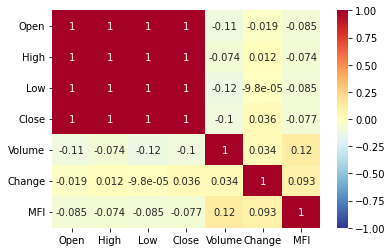

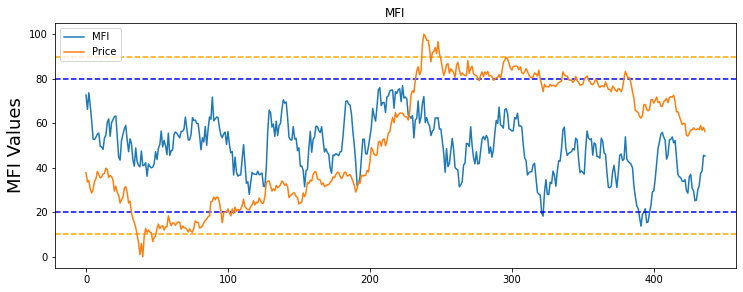

SK하이닉스 000660
 --- pd_base_price --- 
         Date   Open   High    Low  Close   Volume    Change
0  2020-01-02  96000  96200  94100  94700  2342070  0.006376
1  2020-01-03  96500  97900  94300  94500  3021380 -0.002112
2  2020-01-06  93000  95300  92800  94300  2577573 -0.002116
(452, 7)
 --- pd_temp_base_price --- 
         Date    Open    High    Low  Close   Volume    Change
0  2020-01-23  101000  101000  98200  98700  2780104 -0.022772
1  2020-01-28   95500   96900  95000  96300  3630362 -0.024316
2  2020-01-29   96900   99000  96700  97900  2741459  0.016615
(437, 7)
452 437
 --- pd_append_mfi --- 
         Date    Open    High    Low  Close   Volume    Change        MFI
0  2020-01-23  101000  101000  98200  98700  2780104 -0.022772  69.672894
1  2020-01-28   95500   96900  95000  96300  3630362 -0.024316  63.498010
2  2020-01-29   96900   99000  96700  97900  2741459  0.016615  70.777118
 --- pd_append_corr() --- 
            Open      High       Low     Close    Volume    Chan

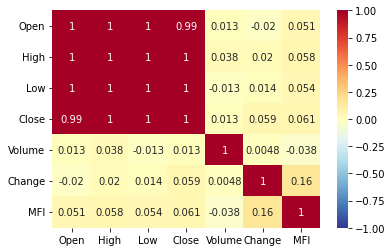

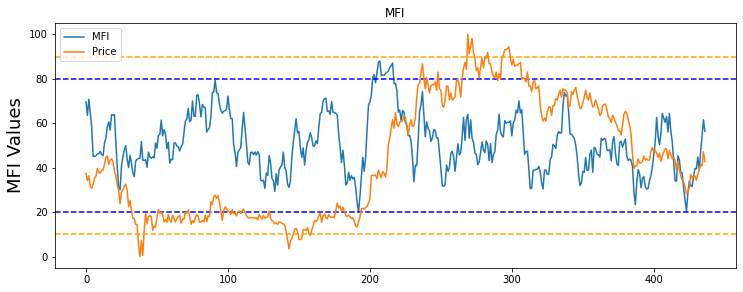

NAVER 035420
 --- pd_base_price --- 
         Date    Open    High     Low   Close  Volume    Change
0  2020-01-02  187500  188000  182000  182500  300640 -0.021448
1  2020-01-03  185000  186000  180500  181500  454492 -0.005479
2  2020-01-06  180000  182000  178000  180500  287970 -0.005510
(452, 7)
 --- pd_temp_base_price --- 
         Date    Open    High     Low   Close  Volume    Change
0  2020-01-23  185000  185500  181500  183000  375929 -0.016129
1  2020-01-28  182000  184500  178000  178500  476253 -0.024590
2  2020-01-29  183000  183500  180000  180000  434897  0.008403
(437, 7)
452 437
 --- pd_append_mfi --- 
         Date    Open    High     Low   Close  Volume    Change        MFI
0  2020-01-23  185000  185500  181500  183000  375929 -0.016129  51.617259
1  2020-01-28  182000  184500  178000  178500  476253 -0.024590  51.022367
2  2020-01-29  183000  183500  180000  180000  434897  0.008403  58.184305
 --- pd_append_corr() --- 
            Open      High       Low     Clos

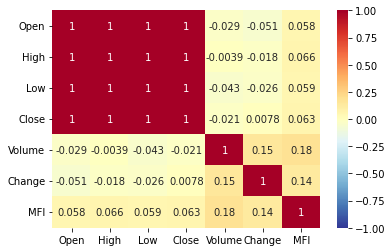

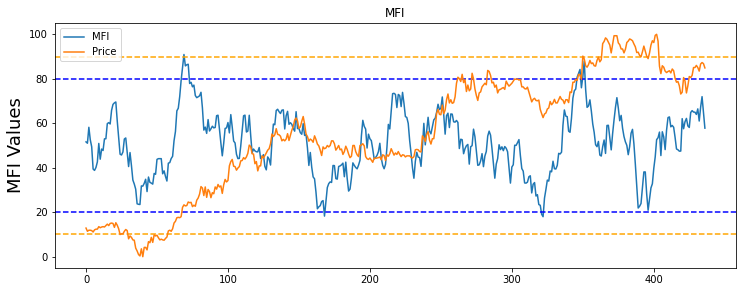

카카오 035720
 --- pd_base_price --- 
         Date   Open   High    Low  Close  Volume    Change
0  2020-01-02  30909  31010  30508  30609  241047 -0.006524
1  2020-01-03  30810  31111  30308  30609  314848  0.000000
2  2020-01-06  30206  31109  30106  31010  393715  0.013101
(452, 7)
 --- pd_temp_base_price --- 
         Date   Open   High    Low  Close  Volume    Change
0  2020-01-23  33718  33718  33016  33218  323420 -0.003001
1  2020-01-28  32114  32817  32014  32616  513228 -0.018123
2  2020-01-29  33218  33318  32616  32817  255167  0.006163
(437, 7)
452 437
 --- pd_append_mfi --- 
         Date   Open   High    Low  Close  Volume    Change        MFI
0  2020-01-23  33718  33718  33016  33218  323420 -0.003001  75.231465
1  2020-01-28  32114  32817  32014  32616  513228 -0.018123  74.165655
2  2020-01-29  33218  33318  32616  32817  255167  0.006163  74.904765
 --- pd_append_corr() --- 
            Open      High       Low     Close    Volume    Change       MFI
Open    1.000000  

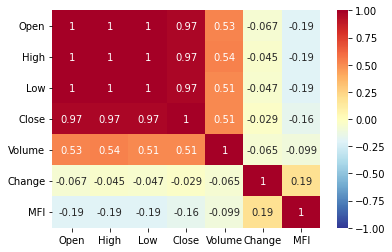

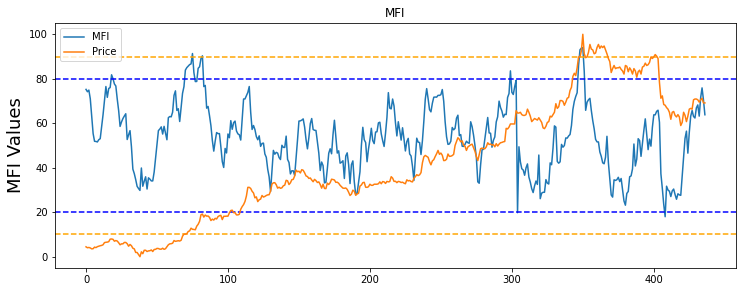

In [34]:
# for f_index in range(0, pd_stock_list.shape[0]):
for f_index in range(0, 4):
  stock_name = pd_stock_list.iloc[f_index][0]
  stock_code = pd_stock_list.iloc[f_index][1]

  print(stock_name, stock_code)

  price_base_filename = 'price/' + str(stock_code) + str('_price.csv')
  price_total_filename = 'price/' + str(stock_code) + str('_total_price.csv')

  # 기존에 가격 정보와 보조지표를 계산한 파일이 있으면 skip
  if os.path.exists(price_total_filename):
    continue
  else:
    pd_fetch_info = pd_stock_gubun_info[pd_stock_gubun_info['종목코드']==stock_code]
    # print(pd_fetch_info['업종분류'])

    # 종목에 관한 주식이 아니면
    if pd_fetch_info['업종분류'].values == 'None':
      print(stock_code, '는 개별 종목 주가가 아님.',)
      continue
    else:
      # 기본 주가 정보를 얻어옴.
      pd_base_price = pd.read_csv(price_base_filename, header=0)
      print(' --- pd_base_price --- ')
      print(pd_base_price.head(3))
      print(pd_base_price.shape)

      # MFI 값을 계산하기 위한 과정 시작
      period_of_mfi = 15

      pd_temp_base_price = pd_base_price.loc[period_of_mfi:,]
      pd_temp_base_price = pd_temp_base_price.reset_index(drop=True)
      print(' --- pd_temp_base_price --- ')
      print(pd_temp_base_price.head(3))
      print(pd_temp_base_price.shape)

      stock_mfi = make_mfi_index(pd_base_price, period_of_mfi)
      print(pd_base_price.shape[0], len(stock_mfi))
      #print(stock_mfi)

      pd_stock_mfi = pd.DataFrame(stock_mfi, columns=['MFI'])

      pd_append_mfi = pd.concat([pd_temp_base_price, pd_stock_mfi], axis=1)

      print(' --- pd_append_mfi --- ')
      print(pd_append_mfi.head(3))

      mfi_corr = pd_append_mfi.corr()
      print(' --- pd_append_corr() --- ')
      print(mfi_corr)
      sns.heatmap(mfi_corr, 
               annot = True,      # 실제 값 화면에 나타내기
               cmap = 'RdYlBu_r',  # Red, Yellow, Blue 색상으로 표시
               vmin = -1, vmax = 1, #컬러차트 -1 ~ 1 범위로 표시
              )
      plt.show()

      plt.figure(figsize=(12.2,4.5)) #width = 12.2in, height = 4.5
      plt.plot(pd_stock_mfi['MFI'],  label='MFI')
      plt.axhline(10, linestyle='--', color = 'orange')  #Over Sold line (Buy)
      plt.axhline(20, linestyle='--',color = 'blue')  #Over Sold Line (Buy)
      plt.axhline(80, linestyle='--', color = 'blue')  #Over Bought line (Sell)
      plt.axhline(90, linestyle='--', color = 'orange')  #Over Bought line (Sell)
      
      min_price = pd_append_mfi['Close'].min()
      max_price = pd_append_mfi['Close'].max()

      scale_price = (pd_append_mfi['Close'] - min_price) / (max_price - min_price)
      scale_price = scale_price * 100

      plt.plot(scale_price, label='Price')
      
      plt.title('MFI')
      plt.ylabel('MFI Values',fontsize=18)
      plt.legend(loc='upper left')

      plt.show()

In [26]:
# https://layhope.tistory.com/233
# https://skyeong.net/281
def make_obv_index(pd_price, period=14):
  pd_obv_price = pd_price.copy()
  
  obv = []
  obv.append(0)

  #Loop through the typical price 
  for i in range(1, pd_obv_price.shape[0]):
    # 다음날 가격이 상승한 경우
    if pd_obv_price.Close[i] > pd_obv_price.Close[i-1]:
      # 현재 obv 값 = 이전 obv + 현재 Volumne 값  
      obv.append(obv[-1] + pd_obv_price.Volume[i])
    # 다음날 가격이 하락한 경우
    elif pd_obv_price.Close[i] < pd_obv_price.Close[i-1]:
      # 현재 obv 값 = 이전 obv - 현재 Volumne 값  
      obv.append(obv[-1] - pd_obv_price.Volume[i])
    else:
      obv.append(obv[-1])

  pd_obv = pd.DataFrame(obv, columns=['OBV'])
  pd_obv['OBV_EMA'] = pd_obv['OBV'].ewm(com=period).mean()

  return pd_obv

삼성전자 005930
 --- pd_base_price --- 
         Date   Open   High    Low  Close    Volume    Change
0  2020-01-02  55500  56000  55000  55200  12993228 -0.010753
1  2020-01-03  56000  56600  54900  55500  15422255  0.005435
2  2020-01-06  54900  55600  54600  55500  10278951  0.000000
(452, 7)
 --- pd_temp_base_price --- 
         Date   Open   High    Low  Close    Volume    Change
0  2020-01-23  61800  61800  60700  60800  14916555 -0.024077
1  2020-01-28  59400  59400  58300  58800  23664541 -0.032895
2  2020-01-29  59100  59700  58800  59100  16446102  0.005102
(437, 7)
452 452
 --- pd_append_obv --- 
         Date     Open     High  ...    Change       OBV       OBV_EMA
0  2020-01-23  61800.0  61800.0  ... -0.024077         0  0.000000e+00
1  2020-01-28  59400.0  59400.0  ... -0.032895  15422255  7.959874e+06
2  2020-01-29  59100.0  59700.0  ...  0.005102  15422255  1.060948e+07

[3 rows x 9 columns]
 --- pd_append_obv.corr() --- 
             Open      High       Low  ...    Change

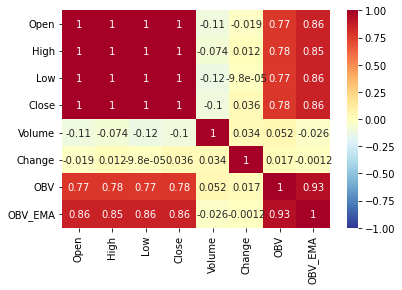

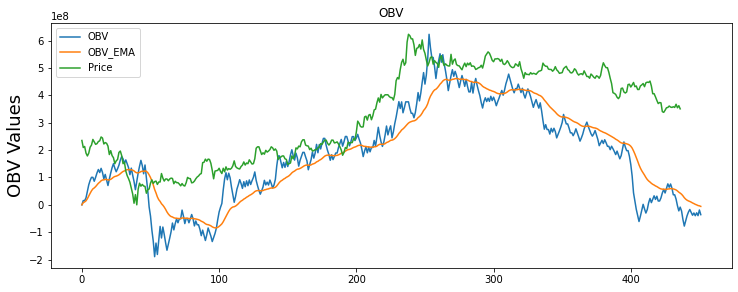

SK하이닉스 000660
 --- pd_base_price --- 
         Date   Open   High    Low  Close   Volume    Change
0  2020-01-02  96000  96200  94100  94700  2342070  0.006376
1  2020-01-03  96500  97900  94300  94500  3021380 -0.002112
2  2020-01-06  93000  95300  92800  94300  2577573 -0.002116
(452, 7)
 --- pd_temp_base_price --- 
         Date    Open    High    Low  Close   Volume    Change
0  2020-01-23  101000  101000  98200  98700  2780104 -0.022772
1  2020-01-28   95500   96900  95000  96300  3630362 -0.024316
2  2020-01-29   96900   99000  96700  97900  2741459  0.016615
(437, 7)
452 452
 --- pd_append_obv --- 
         Date      Open      High  ...    Change      OBV       OBV_EMA
0  2020-01-23  101000.0  101000.0  ... -0.022772        0  0.000000e+00
1  2020-01-28   95500.0   96900.0  ... -0.024316 -3021380 -1.559422e+06
2  2020-01-29   96900.0   99000.0  ...  0.016615 -5598953 -2.993708e+06

[3 rows x 9 columns]
 --- pd_append_obv.corr() --- 
             Open      High       Low  ...    

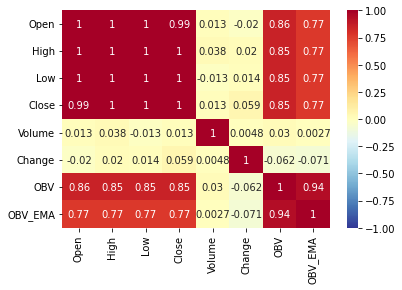

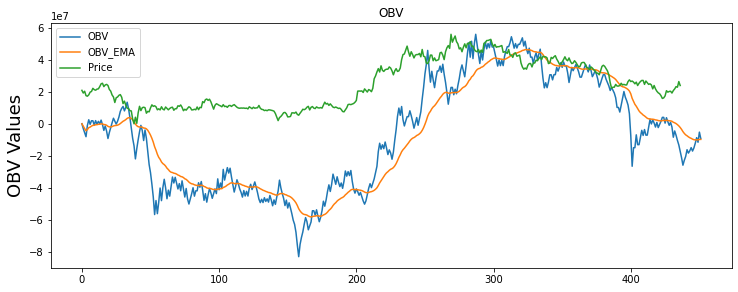

NAVER 035420
 --- pd_base_price --- 
         Date    Open    High     Low   Close  Volume    Change
0  2020-01-02  187500  188000  182000  182500  300640 -0.021448
1  2020-01-03  185000  186000  180500  181500  454492 -0.005479
2  2020-01-06  180000  182000  178000  180500  287970 -0.005510
(452, 7)
 --- pd_temp_base_price --- 
         Date    Open    High     Low   Close  Volume    Change
0  2020-01-23  185000  185500  181500  183000  375929 -0.016129
1  2020-01-28  182000  184500  178000  178500  476253 -0.024590
2  2020-01-29  183000  183500  180000  180000  434897  0.008403
(437, 7)
452 452
 --- pd_append_obv --- 
         Date      Open      High  ...    Change     OBV        OBV_EMA
0  2020-01-23  185000.0  185500.0  ... -0.016129       0       0.000000
1  2020-01-28  182000.0  184500.0  ... -0.024590 -454492 -234576.516129
2  2020-01-29  183000.0  183500.0  ...  0.008403 -742462 -414907.561720

[3 rows x 9 columns]
 --- pd_append_obv.corr() --- 
             Open      High    

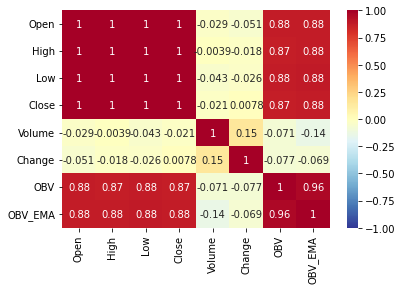

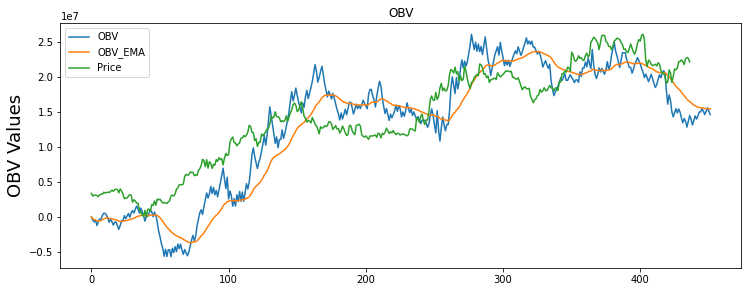

카카오 035720
 --- pd_base_price --- 
         Date   Open   High    Low  Close  Volume    Change
0  2020-01-02  30909  31010  30508  30609  241047 -0.006524
1  2020-01-03  30810  31111  30308  30609  314848  0.000000
2  2020-01-06  30206  31109  30106  31010  393715  0.013101
(452, 7)
 --- pd_temp_base_price --- 
         Date   Open   High    Low  Close  Volume    Change
0  2020-01-23  33718  33718  33016  33218  323420 -0.003001
1  2020-01-28  32114  32817  32014  32616  513228 -0.018123
2  2020-01-29  33218  33318  32616  32817  255167  0.006163
(437, 7)
452 452
 --- pd_append_obv --- 
         Date     Open     High  ...    Change     OBV        OBV_EMA
0  2020-01-23  33718.0  33718.0  ... -0.003001       0       0.000000
1  2020-01-28  32114.0  32817.0  ... -0.018123       0       0.000000
2  2020-01-29  33218.0  33318.0  ...  0.006163  393715  139793.398058

[3 rows x 9 columns]
 --- pd_append_obv.corr() --- 
             Open      High       Low  ...    Change       OBV   OBV_EMA


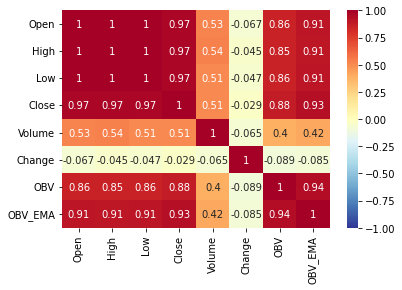

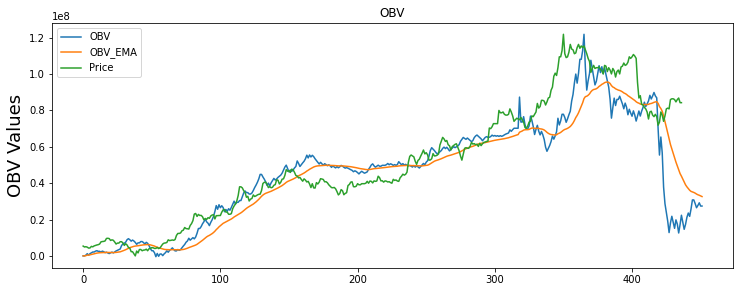

In [35]:
# for f_index in range(0, pd_stock_list.shape[0]):
for f_index in range(0, 4):
  stock_name = pd_stock_list.iloc[f_index][0]
  stock_code = pd_stock_list.iloc[f_index][1]

  print(stock_name, stock_code)

  price_base_filename = 'price/' + str(stock_code) + str('_price.csv')
  price_total_filename = 'price/' + str(stock_code) + str('_total_price.csv')

  # 기존에 가격 정보와 보조지표를 계산한 파일이 있으면 skip
  if os.path.exists(price_total_filename):
    continue
  else:
    pd_fetch_info = pd_stock_gubun_info[pd_stock_gubun_info['종목코드']==stock_code]
    # print(pd_fetch_info['업종분류'])

    # 종목에 관한 주식이 아니면
    if pd_fetch_info['업종분류'].values == 'None':
      print(stock_code, '는 개별 종목 주가가 아님.',)
      continue
    else:
      # 기본 주가 정보를 얻어옴.
      pd_base_price = pd.read_csv(price_base_filename, header=0)
      print(' --- pd_base_price --- ')
      print(pd_base_price.head(3))
      print(pd_base_price.shape)

      # OBV 값을 계산하기 위한 과정 시작
      period_of_obv = 15

      pd_temp_base_price = pd_base_price.loc[period_of_obv:,]
      pd_temp_base_price = pd_temp_base_price.reset_index(drop=True)
      print(' --- pd_temp_base_price --- ')
      print(pd_temp_base_price.head(3))
      print(pd_temp_base_price.shape)

      pd_stock_obv = make_obv_index(pd_base_price, period_of_obv)
      print(pd_base_price.shape[0], len(pd_stock_obv))
      #print(stock_obv)

      pd_append_obv = pd.concat([pd_temp_base_price, pd_stock_obv], axis=1)

      print(' --- pd_append_obv --- ')
      print(pd_append_obv.head(3))

      obv_corr = pd_append_obv.corr()
      print(' --- pd_append_obv.corr() --- ')
      print(obv_corr)
      sns.heatmap(obv_corr, 
               annot = True,      # 실제 값 화면에 나타내기
               cmap = 'RdYlBu_r',  # Red, Yellow, Blue 색상으로 표시
               vmin = -1, vmax = 1, #컬러차트 -1 ~ 1 범위로 표시
              )
      plt.show()

      plt.figure(figsize=(12.2,4.5)) #width = 12.2in, height = 4.5
      plt.plot(pd_append_obv['OBV'],  label='OBV')
      plt.plot(pd_append_obv['OBV_EMA'],  label='OBV_EMA')
      
      min_price = pd_append_obv['Close'].min()
      max_price = pd_append_obv['Close'].max()

      scale_price = (pd_append_obv['Close'] - min_price) / (max_price - min_price)
      scale_price = scale_price * pd_append_obv['OBV'].max()

      plt.plot(scale_price, label='Price')
      
      plt.title('OBV')
      plt.ylabel('OBV Values',fontsize=18)
      plt.legend(loc='upper left')

      plt.show()

In [28]:
# https://layhope.tistory.com/495
def make_pvt_index(pd_price, period=14):
  pd_pvt_price = pd_price.copy()
  
  pvt = []
  pvt.append(0)

  #Loop through the typical price 
  for i in range(1, pd_pvt_price.shape[0]):
    pvt_value = pd_pvt_price.Close[i] - pd_pvt_price.Close[i-1]
    pvt_value = (pvt_value / pd_pvt_price.Close[i-1]) * pd_pvt_price.Volume[i]
    pvt_value = pvt_value + pvt[-1]

    pvt.append(pvt_value)

  pd_pvt = pd.DataFrame(pvt, columns=['PVT'])
  pd_pvt['PVT_EMA'] = pd_pvt['PVT'].ewm(com=period).mean()

  return pd_pvt

삼성전자 005930
 --- pd_base_price --- 
         Date   Open   High    Low  Close    Volume    Change
0  2020-01-02  55500  56000  55000  55200  12993228 -0.010753
1  2020-01-03  56000  56600  54900  55500  15422255  0.005435
2  2020-01-06  54900  55600  54600  55500  10278951  0.000000
(452, 7)
 --- pd_temp_base_price --- 
         Date   Open   High    Low  Close    Volume    Change
0  2020-01-23  61800  61800  60700  60800  14916555 -0.024077
1  2020-01-28  59400  59400  58300  58800  23664541 -0.032895
2  2020-01-29  59100  59700  58800  59100  16446102  0.005102
(437, 7)
452 452
 --- pd_append_obv --- 
         Date     Open     High  ...    Change           PVT       PVT_EMA
0  2020-01-23  61800.0  61800.0  ... -0.024077      0.000000      0.000000
1  2020-01-28  59400.0  59400.0  ... -0.032895  83816.603261  43260.182328
2  2020-01-29  59100.0  59700.0  ...  0.005102  83816.603261  57660.243020

[3 rows x 9 columns]
 --- pd_append_pvt.corr() --- 
             Open      High       Lo

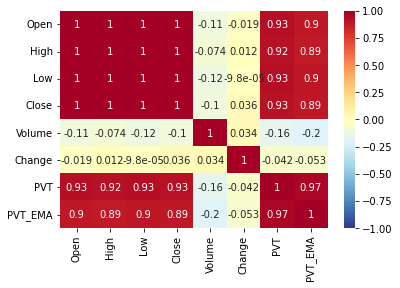

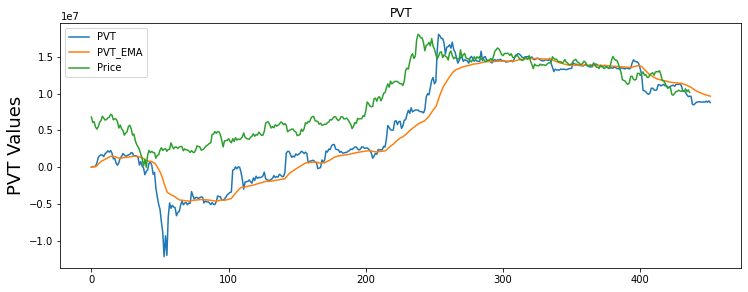

SK하이닉스 000660
 --- pd_base_price --- 
         Date   Open   High    Low  Close   Volume    Change
0  2020-01-02  96000  96200  94100  94700  2342070  0.006376
1  2020-01-03  96500  97900  94300  94500  3021380 -0.002112
2  2020-01-06  93000  95300  92800  94300  2577573 -0.002116
(452, 7)
 --- pd_temp_base_price --- 
         Date    Open    High    Low  Close   Volume    Change
0  2020-01-23  101000  101000  98200  98700  2780104 -0.022772
1  2020-01-28   95500   96900  95000  96300  3630362 -0.024316
2  2020-01-29   96900   99000  96700  97900  2741459  0.016615
(437, 7)
452 452
 --- pd_append_obv --- 
         Date      Open      High  ...    Change           PVT      PVT_EMA
0  2020-01-23  101000.0  101000.0  ... -0.022772      0.000000     0.000000
1  2020-01-28   95500.0   96900.0  ... -0.024316  -6380.950370 -3293.393739
2  2020-01-29   96900.0   99000.0  ...  0.016615 -11836.131322 -6326.598762

[3 rows x 9 columns]
 --- pd_append_pvt.corr() --- 
             Open      High   

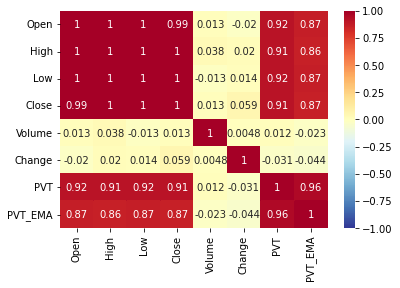

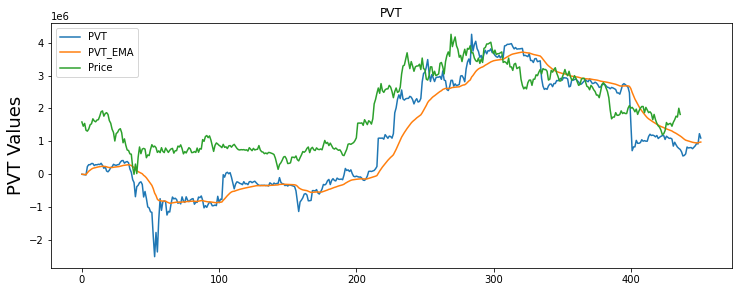

NAVER 035420
 --- pd_base_price --- 
         Date    Open    High     Low   Close  Volume    Change
0  2020-01-02  187500  188000  182000  182500  300640 -0.021448
1  2020-01-03  185000  186000  180500  181500  454492 -0.005479
2  2020-01-06  180000  182000  178000  180500  287970 -0.005510
(452, 7)
 --- pd_temp_base_price --- 
         Date    Open    High     Low   Close  Volume    Change
0  2020-01-23  185000  185500  181500  183000  375929 -0.016129
1  2020-01-28  182000  184500  178000  178500  476253 -0.024590
2  2020-01-29  183000  183500  180000  180000  434897  0.008403
(437, 7)
452 452
 --- pd_append_obv --- 
         Date      Open      High  ...    Change          PVT      PVT_EMA
0  2020-01-23  185000.0  185500.0  ... -0.016129     0.000000     0.000000
1  2020-01-28  182000.0  184500.0  ... -0.024590 -2490.367123 -1285.350773
2  2020-01-29  183000.0  183500.0  ...  0.008403 -4076.978694 -2276.552920

[3 rows x 9 columns]
 --- pd_append_pvt.corr() --- 
             Open  

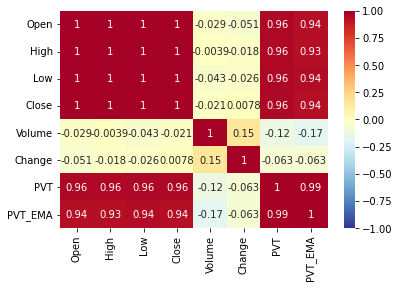

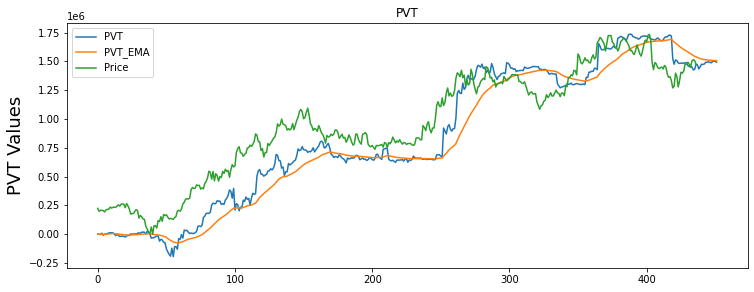

카카오 035720
 --- pd_base_price --- 
         Date   Open   High    Low  Close  Volume    Change
0  2020-01-02  30909  31010  30508  30609  241047 -0.006524
1  2020-01-03  30810  31111  30308  30609  314848  0.000000
2  2020-01-06  30206  31109  30106  31010  393715  0.013101
(452, 7)
 --- pd_temp_base_price --- 
         Date   Open   High    Low  Close  Volume    Change
0  2020-01-23  33718  33718  33016  33218  323420 -0.003001
1  2020-01-28  32114  32817  32014  32616  513228 -0.018123
2  2020-01-29  33218  33318  32616  32817  255167  0.006163
(437, 7)
452 452
 --- pd_append_obv --- 
         Date     Open     High  ...    Change          PVT      PVT_EMA
0  2020-01-23  33718.0  33718.0  ... -0.003001     0.000000     0.000000
1  2020-01-28  32114.0  32817.0  ... -0.018123     0.000000     0.000000
2  2020-01-29  33218.0  33318.0  ...  0.006163  5157.950766  1831.394447

[3 rows x 9 columns]
 --- pd_append_pvt.corr() --- 
             Open      High       Low  ...    Change       PV

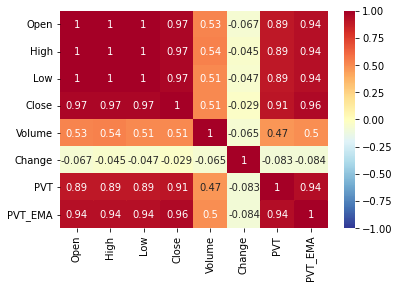

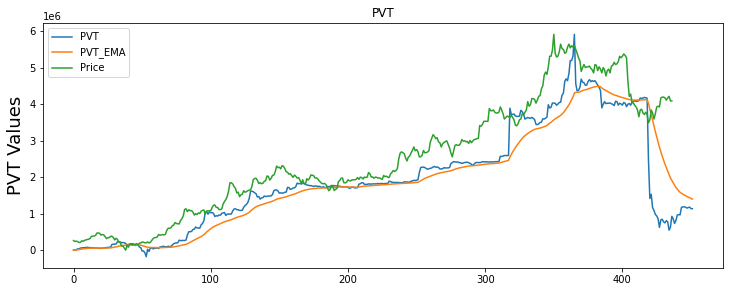

In [36]:
# for f_index in range(0, pd_stock_list.shape[0]):
for f_index in range(0, 4):
  stock_name = pd_stock_list.iloc[f_index][0]
  stock_code = pd_stock_list.iloc[f_index][1]

  print(stock_name, stock_code)

  price_base_filename = 'price/' + str(stock_code) + str('_price.csv')
  price_total_filename = 'price/' + str(stock_code) + str('_total_price.csv')

  # 기존에 가격 정보와 보조지표를 계산한 파일이 있으면 skip
  if os.path.exists(price_total_filename):
    continue
  else:
    pd_fetch_info = pd_stock_gubun_info[pd_stock_gubun_info['종목코드']==stock_code]
    # print(pd_fetch_info['업종분류'])

    # 종목에 관한 주식이 아니면
    if pd_fetch_info['업종분류'].values == 'None':
      print(stock_code, '는 개별 종목 주가가 아님.',)
      continue
    else:
      # 기본 주가 정보를 얻어옴.
      pd_base_price = pd.read_csv(price_base_filename, header=0)
      print(' --- pd_base_price --- ')
      print(pd_base_price.head(3))
      print(pd_base_price.shape)

      # PVT 값을 계산하기 위한 과정 시작
      period_of_pvt = 15

      pd_temp_base_price = pd_base_price.loc[period_of_pvt:,]
      pd_temp_base_price = pd_temp_base_price.reset_index(drop=True)
      print(' --- pd_temp_base_price --- ')
      print(pd_temp_base_price.head(3))
      print(pd_temp_base_price.shape)

      pd_stock_pvt = make_pvt_index(pd_base_price, period_of_pvt)
      print(pd_base_price.shape[0], len(pd_stock_pvt))
      #print(pd_stock_pvt)

      pd_append_pvt = pd.concat([pd_temp_base_price, pd_stock_pvt], axis=1)

      print(' --- pd_append_pvt --- ')
      print(pd_append_pvt.head(3))

      pvt_corr = pd_append_pvt.corr()
      print(' --- pd_append_pvt.corr() --- ')
      print(pvt_corr)
      sns.heatmap(pvt_corr, 
               annot = True,      # 실제 값 화면에 나타내기
               cmap = 'RdYlBu_r',  # Red, Yellow, Blue 색상으로 표시
               vmin = -1, vmax = 1, #컬러차트 -1 ~ 1 범위로 표시
              )
      plt.show()

      plt.figure(figsize=(12.2,4.5)) #width = 12.2in, height = 4.5
      plt.plot(pd_append_pvt['PVT'],  label='PVT')
      plt.plot(pd_append_pvt['PVT_EMA'],  label='PVT_EMA')
      
      min_price = pd_append_pvt['Close'].min()
      max_price = pd_append_pvt['Close'].max()

      scale_price = (pd_append_pvt['Close'] - min_price) / (max_price - min_price)
      scale_price = scale_price * pd_append_pvt['PVT'].max()

      plt.plot(scale_price, label='Price')
      
      plt.title('PVT')
      plt.ylabel('PVT Values',fontsize=18)
      plt.legend(loc='upper left')

      plt.show()


In [64]:
# https://layhope.tistory.com/495
def make_macd_index(pd_price, fast, slow, smooth):
  pd_macd_price = pd_price.copy()
  
  exp1 = pd_macd_price['Close'].ewm(span = fast, adjust = False).mean()
  exp2 = pd_macd_price['Close'].ewm(span = slow, adjust = False).mean()
  
  macd = pd.DataFrame(exp1 - exp2).rename(columns = {'Close':'Macd'})
  print('-- macd.head --')
  print(macd.head(3))

  signal = pd.DataFrame(macd.ewm(span = smooth, adjust = False).mean()).rename(columns = {'Macd':'Signal'})
  print('-- signal.head --')
  print(signal.head(3))

  hist = pd.DataFrame(macd['Macd'] - signal['Signal']).rename(columns = {0:'Hist'})
  frames = [macd, signal, hist]
  pd_macd = pd.concat(frames, join = 'inner', axis = 1)

  return pd_macd

삼성전자 005930
 --- pd_base_price --- 
         Date   Open   High    Low  Close    Volume    Change
0  2020-01-02  55500  56000  55000  55200  12993228 -0.010753
1  2020-01-03  56000  56600  54900  55500  15422255  0.005435
2  2020-01-06  54900  55600  54600  55500  10278951  0.000000
(452, 7)
 --- pd_temp_base_price --- 
         Date   Open   High    Low  Close    Volume    Change
0  2020-01-23  61800  61800  60700  60800  14916555 -0.024077
1  2020-01-28  59400  59400  58300  58800  23664541 -0.032895
2  2020-01-29  59100  59700  58800  59100  16446102  0.005102
(437, 7)
-- macd.head --
        Macd
0   0.000000
1  25.974026
2  44.751785
-- signal.head --
      Signal
0   0.000000
1   8.658009
2  20.689267
452 (452, 3)
 --- pd_append_macd --- 
         Date     Open     High  ...       Macd     Signal       Hist
0  2020-01-23  61800.0  61800.0  ...   0.000000   0.000000   0.000000
1  2020-01-28  59400.0  59400.0  ...  25.974026   8.658009  17.316017
2  2020-01-29  59100.0  59700.0  ..

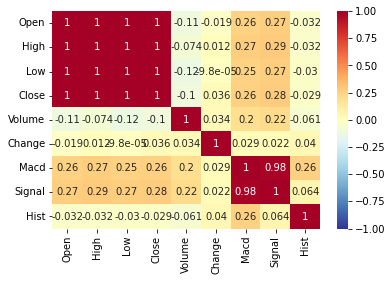

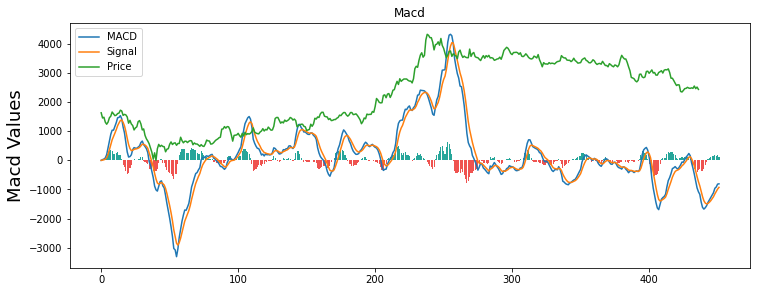

SK하이닉스 000660
 --- pd_base_price --- 
         Date   Open   High    Low  Close   Volume    Change
0  2020-01-02  96000  96200  94100  94700  2342070  0.006376
1  2020-01-03  96500  97900  94300  94500  3021380 -0.002112
2  2020-01-06  93000  95300  92800  94300  2577573 -0.002116
(452, 7)
 --- pd_temp_base_price --- 
         Date    Open    High    Low  Close   Volume    Change
0  2020-01-23  101000  101000  98200  98700  2780104 -0.022772
1  2020-01-28   95500   96900  95000  96300  3630362 -0.024316
2  2020-01-29   96900   99000  96700  97900  2741459  0.016615
(437, 7)
-- macd.head --
        Macd
0   0.000000
1 -17.316017
2 -47.150541
-- signal.head --
      Signal
0   0.000000
1  -5.772006
2 -19.564851
452 (452, 3)
 --- pd_append_macd --- 
         Date      Open      High  ...       Macd     Signal       Hist
0  2020-01-23  101000.0  101000.0  ...   0.000000   0.000000   0.000000
1  2020-01-28   95500.0   96900.0  ... -17.316017  -5.772006 -11.544012
2  2020-01-29   96900.0   9

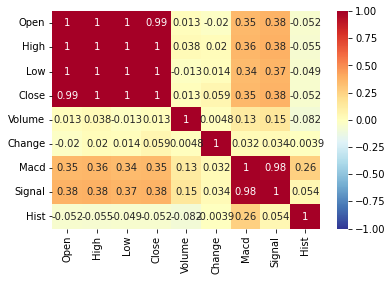

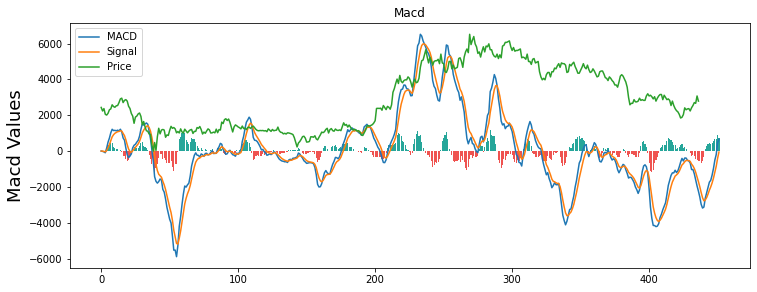

NAVER 035420
 --- pd_base_price --- 
         Date    Open    High     Low   Close  Volume    Change
0  2020-01-02  187500  188000  182000  182500  300640 -0.021448
1  2020-01-03  185000  186000  180500  181500  454492 -0.005479
2  2020-01-06  180000  182000  178000  180500  287970 -0.005510
(452, 7)
 --- pd_temp_base_price --- 
         Date    Open    High     Low   Close  Volume    Change
0  2020-01-23  185000  185500  181500  183000  375929 -0.016129
1  2020-01-28  182000  184500  178000  178500  476253 -0.024590
2  2020-01-29  183000  183500  180000  180000  434897  0.008403
(437, 7)
-- macd.head --
         Macd
0    0.000000
1  -86.580087
2 -235.752703
-- signal.head --
      Signal
0   0.000000
1 -28.860029
2 -97.824254
452 (452, 3)
 --- pd_append_macd --- 
         Date      Open      High  ...        Macd     Signal        Hist
0  2020-01-23  185000.0  185500.0  ...    0.000000   0.000000    0.000000
1  2020-01-28  182000.0  184500.0  ...  -86.580087 -28.860029  -57.720058
2 

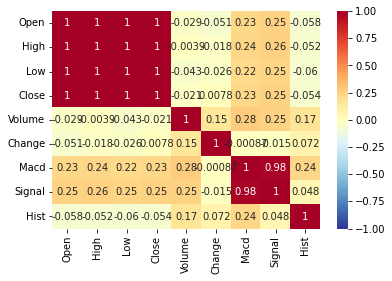

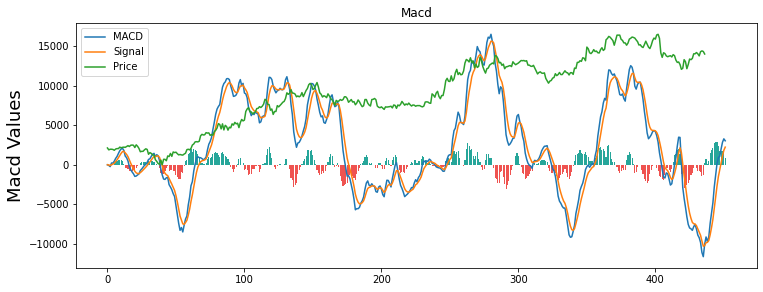

카카오 035720
 --- pd_base_price --- 
         Date   Open   High    Low  Close  Volume    Change
0  2020-01-02  30909  31010  30508  30609  241047 -0.006524
1  2020-01-03  30810  31111  30308  30609  314848  0.000000
2  2020-01-06  30206  31109  30106  31010  393715  0.013101
(452, 7)
 --- pd_temp_base_price --- 
         Date   Open   High    Low  Close  Volume    Change
0  2020-01-23  33718  33718  33016  33218  323420 -0.003001
1  2020-01-28  32114  32817  32014  32616  513228 -0.018123
2  2020-01-29  33218  33318  32616  32817  255167  0.006163
(437, 7)
-- macd.head --
        Macd
0   0.000000
1   0.000000
2  34.718615
-- signal.head --
      Signal
0   0.000000
1   0.000000
2  11.572872
452 (452, 3)
 --- pd_append_macd --- 
         Date     Open     High  ...       Macd     Signal       Hist
0  2020-01-23  33718.0  33718.0  ...   0.000000   0.000000   0.000000
1  2020-01-28  32114.0  32817.0  ...   0.000000   0.000000   0.000000
2  2020-01-29  33218.0  33318.0  ...  34.718615  11.

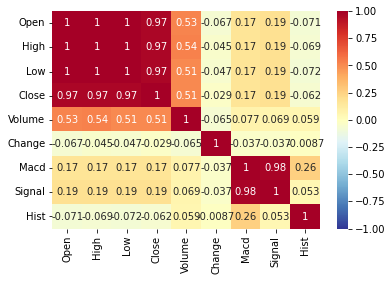

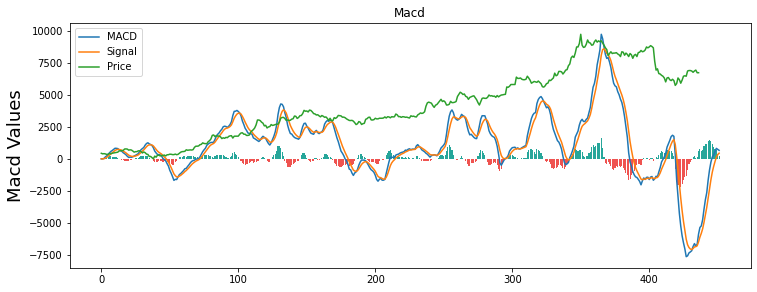

In [68]:
# for f_index in range(0, pd_stock_list.shape[0]):
for f_index in range(0, 4):
  stock_name = pd_stock_list.iloc[f_index][0]
  stock_code = pd_stock_list.iloc[f_index][1]

  print(stock_name, stock_code)

  price_base_filename = 'price/' + str(stock_code) + str('_price.csv')
  price_total_filename = 'price/' + str(stock_code) + str('_total_price.csv')

  # 기존에 가격 정보와 보조지표를 계산한 파일이 있으면 skip
  if os.path.exists(price_total_filename):
    continue
  else:
    pd_fetch_info = pd_stock_gubun_info[pd_stock_gubun_info['종목코드']==stock_code]
    # print(pd_fetch_info['업종분류'])

    # 종목에 관한 주식이 아니면
    if pd_fetch_info['업종분류'].values == 'None':
      print(stock_code, '는 개별 종목 주가가 아님.',)
      continue
    else:
      # 기본 주가 정보를 얻어옴.
      pd_base_price = pd.read_csv(price_base_filename, header=0)
      print(' --- pd_base_price --- ')
      print(pd_base_price.head(3))
      print(pd_base_price.shape)

      # MACD 값을 계산하기 위한 과정 시작
      fast_of_macd = 10
      slow_of_macd = 20
      smooth_of_macd = 5

      pd_temp_base_price = pd_base_price.loc[period_of_pvt:,]
      pd_temp_base_price = pd_temp_base_price.reset_index(drop=True)
      print(' --- pd_temp_base_price --- ')
      print(pd_temp_base_price.head(3))
      print(pd_temp_base_price.shape)

      pd_stock_macd = make_macd_index(pd_base_price, fast_of_macd, slow_of_macd, smooth_of_macd)
      print(pd_base_price.shape[0], pd_stock_macd.shape)
      #print(pd_stock_macd)

      pd_append_macd = pd.concat([pd_temp_base_price, pd_stock_macd], axis=1)

      print(' --- pd_append_macd --- ')
      print(pd_append_macd.head(3))

      macd_corr = pd_append_macd.corr()
      print(' --- pd_append_macd.corr() --- ')
      print(macd_corr)
      sns.heatmap(macd_corr, 
               annot = True,      # 실제 값 화면에 나타내기
               cmap = 'RdYlBu_r',  # Red, Yellow, Blue 색상으로 표시
               vmin = -1, vmax = 1, #컬러차트 -1 ~ 1 범위로 표시
              )
      plt.show()


      plt.figure(figsize=(12.2,4.5)) #width = 12.2in, height = 4.5
      plt.plot(pd_append_macd['Macd'],  label='MACD')
      plt.plot(pd_append_macd['Signal'],  label='Signal')

      for i in range(0, pd_append_macd.shape[0]):
        if str(pd_append_macd['Hist'][i])[0] == '-':
            plt.bar(pd_append_macd.index[i], pd_append_macd['Hist'][i], color = '#ef5350')
        else:
            plt.bar(pd_append_macd.index[i], pd_append_macd['Hist'][i], color = '#26a69a')
      
      min_price = pd_append_macd['Close'].min()
      max_price = pd_append_macd['Close'].max()

      scale_price = (pd_append_macd['Close'] - min_price) / (max_price - min_price)
      scale_price = scale_price * pd_append_macd['Macd'].max()

      plt.plot(scale_price, label='Price')
      
      plt.title('Macd')
      plt.ylabel('Macd Values',fontsize=18)
      plt.legend(loc='upper left')

      plt.show()
   